In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 18240
team_id = 169 # 180/169
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g)

df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=team_id)
df_actions = (
spadl
.add_names(df_actions)
.merge(api.teams(game_id=g))
.merge(api.players(game_id=g))
)
df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

    nice_time    player_name          type_name    result_name    team_name
--  -----------  -------------------  -----------  -------------  -------------
 0  58m47s       Manuel Neuer         pass         success        Bayern Munich
 1  58m51s       Mario Mandžukić      dribble      success        Bayern Munich
 2  58m51s       Mario Mandžukić      pass         success        Bayern Munich
 3  58m53s       Arjen Robben         dribble      success        Bayern Munich
 4  58m56s       Arjen Robben         pass         success        Bayern Munich
 5  58m57s       Franck Bilal Ribéry  dribble      success        Bayern Munich
 6  59m1s        Franck Bilal Ribéry  pass         success        Bayern Munich
 7  59m2s        Arjen Robben         dribble      success        Bayern Munich
 8  59m3s        Arjen Robben         cross        success        Bayern Munich
 9  59m4s        Mario Mandžukić      shot         success        Bayern Munich


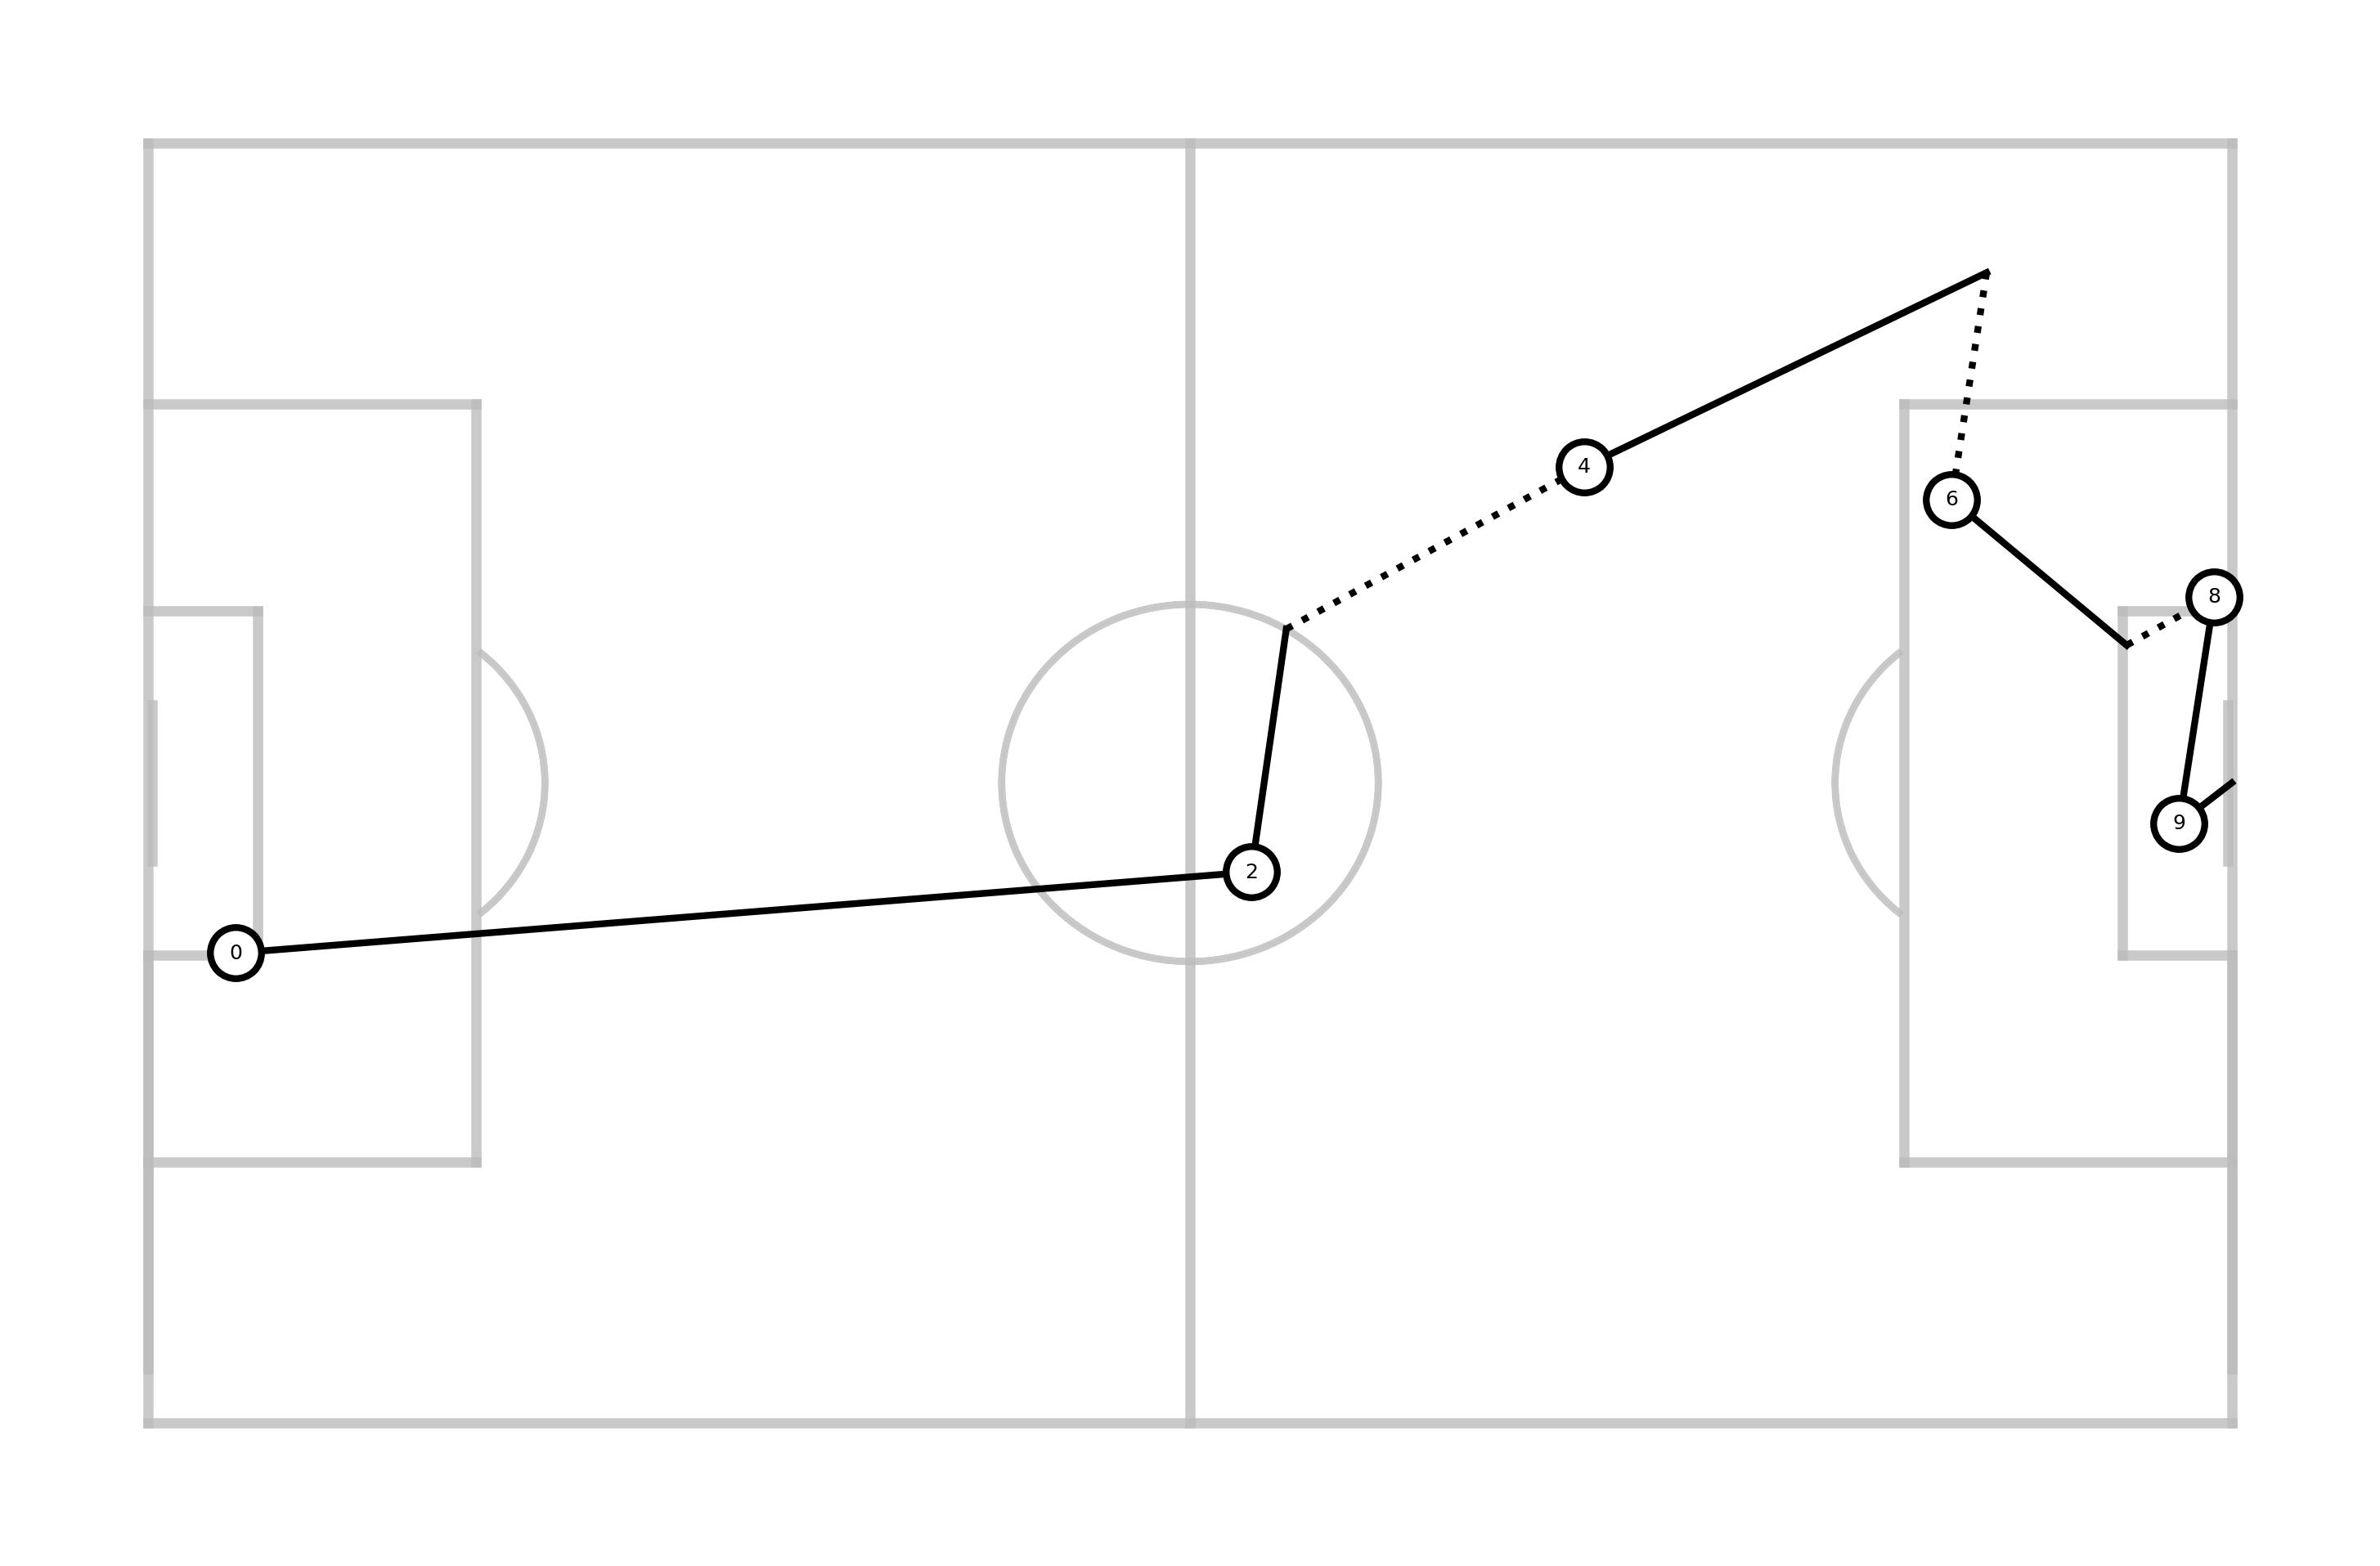

    nice_time    player_name                   type_name     result_name    team_name
--  -----------  ----------------------------  ------------  -------------  -----------------
 0  66m11s       Roman Weidenfeller            dribble       success        Borussia Dortmund
 1  66m14s       Roman Weidenfeller            pass          success        Borussia Dortmund
 2  66m16s       Mats Hummels                  dribble       success        Borussia Dortmund
 3  66m24s       Mats Hummels                  pass          fail           Borussia Dortmund
 4  66m26s       Jérôme Boateng                pass          fail           Bayern Munich
 5  66m28s       Kevin Großkreutz              dribble       success        Borussia Dortmund
 6  66m28s       Kevin Großkreutz              pass          success        Borussia Dortmund
 7  66m30s       Marco Reus                    dribble       success        Borussia Dortmund
 8  66m32s       Dante Bonfim da Costa Santos  foul          success    

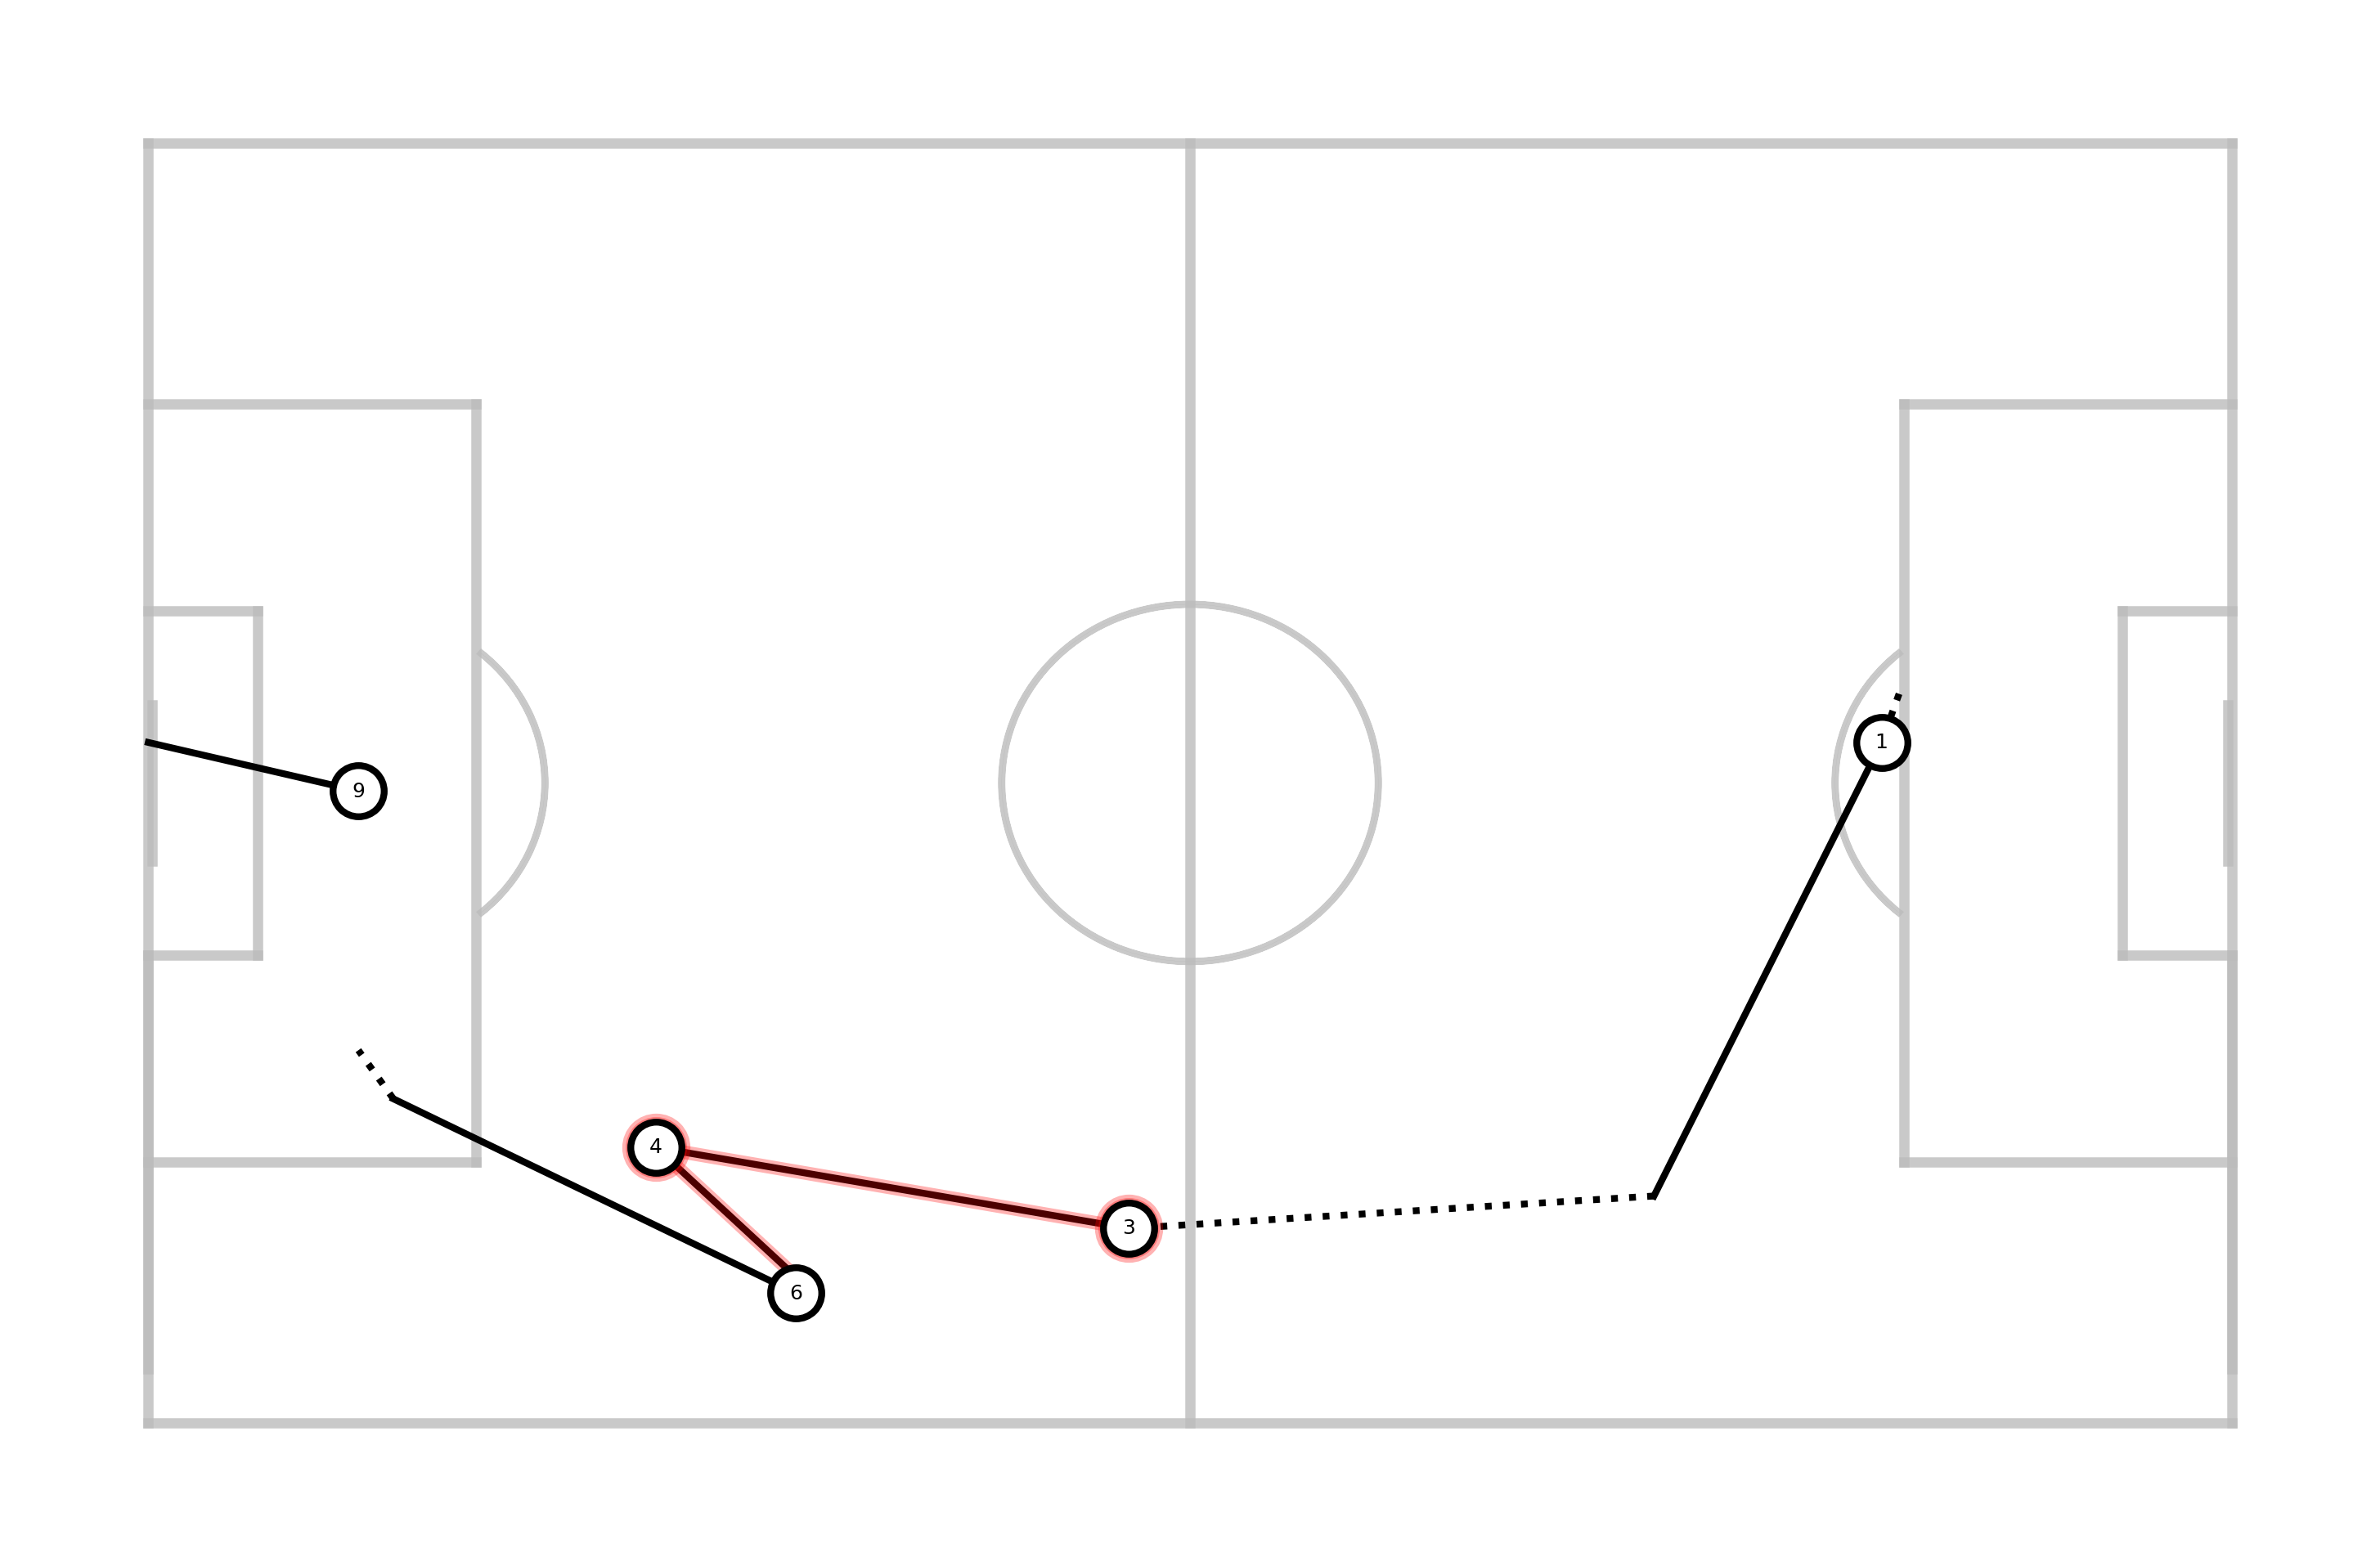

    nice_time    player_name             type_name         result_name    team_name
--  -----------  ----------------------  ----------------  -------------  -----------------
 0  87m21s       Bastian Schweinsteiger  corner_crossed    success        Bayern Munich
 1  87m23s       Mario Mandžukić         cross             fail           Bayern Munich
 2  87m51s       Robert Lewandowski      foul              success        Borussia Dortmund
 3  88m17s       Jérôme Boateng          freekick_crossed  success        Bayern Munich
 4  88m20s       Franck Bilal Ribéry     dribble           success        Bayern Munich
 5  88m20s       Franck Bilal Ribéry     pass              success        Bayern Munich
 6  88m21s       Arjen Robben            dribble           success        Bayern Munich
 7  88m22s       Arjen Robben            take_on           success        Bayern Munich
 8  88m22s       Arjen Robben            dribble           success        Bayern Munich
 9  88m23s       Arjen Robbe

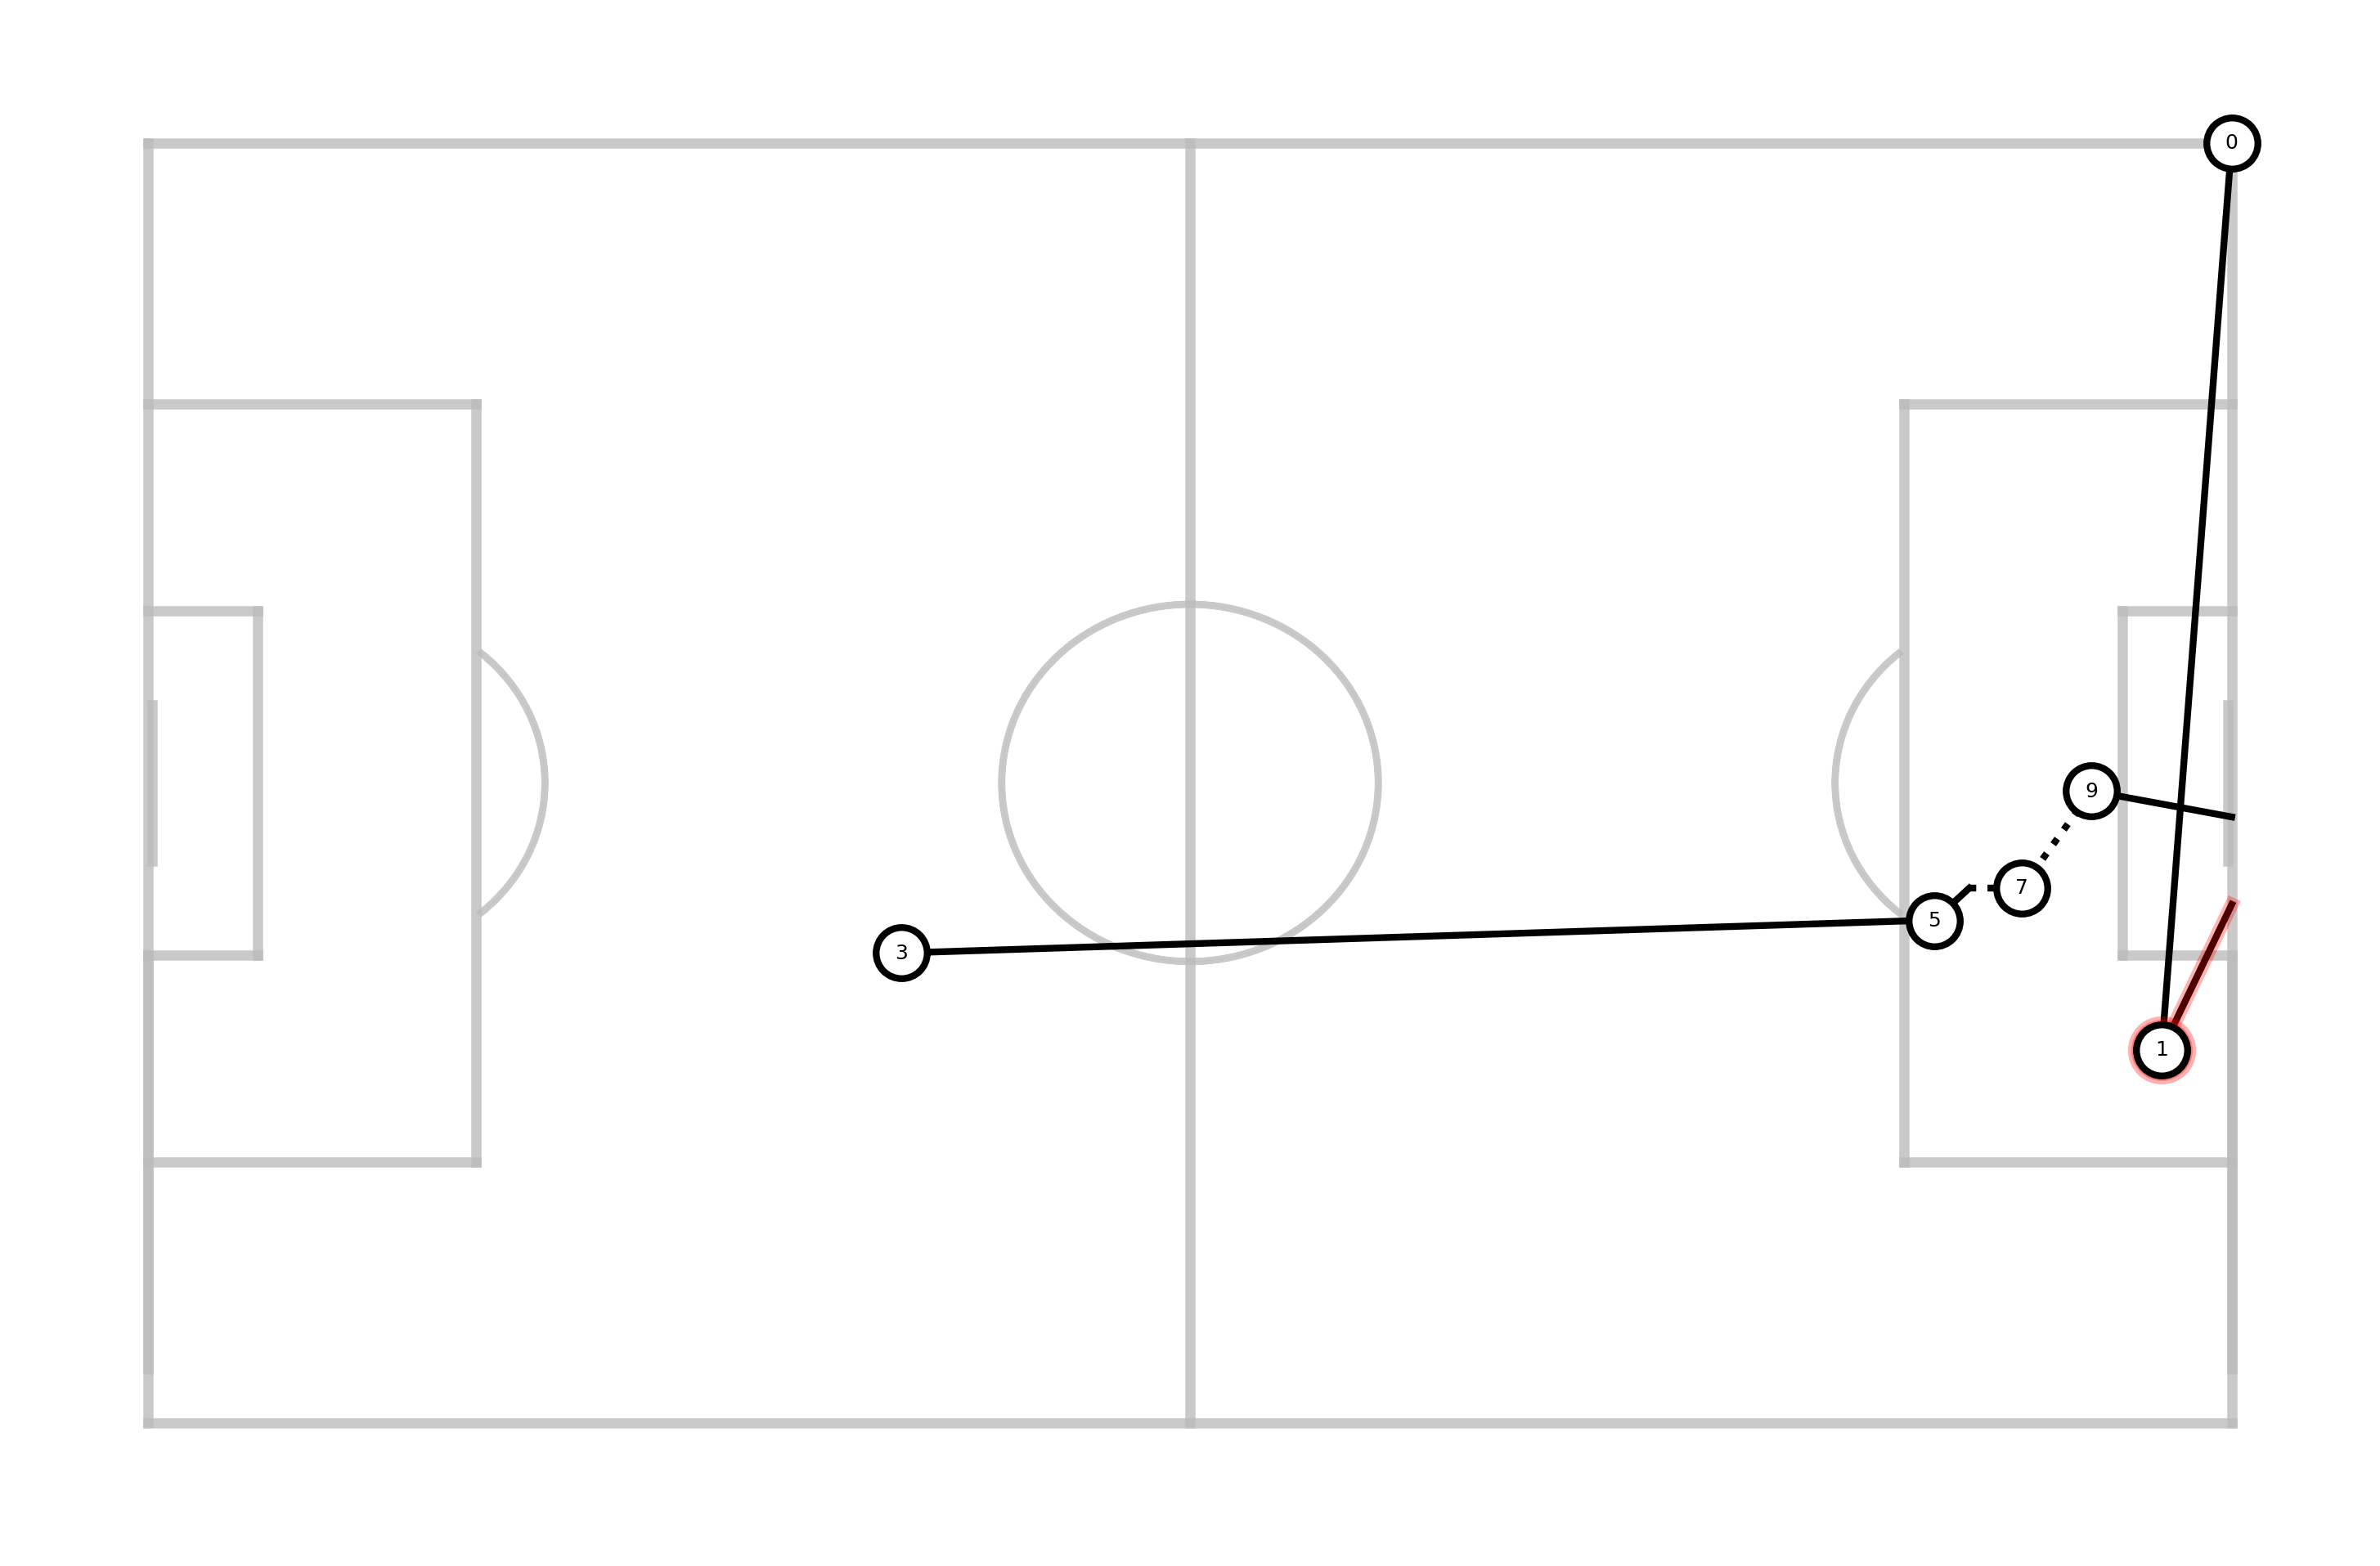

In [3]:
import statsbombplot as pys

pys.draw_goals(df_actions)